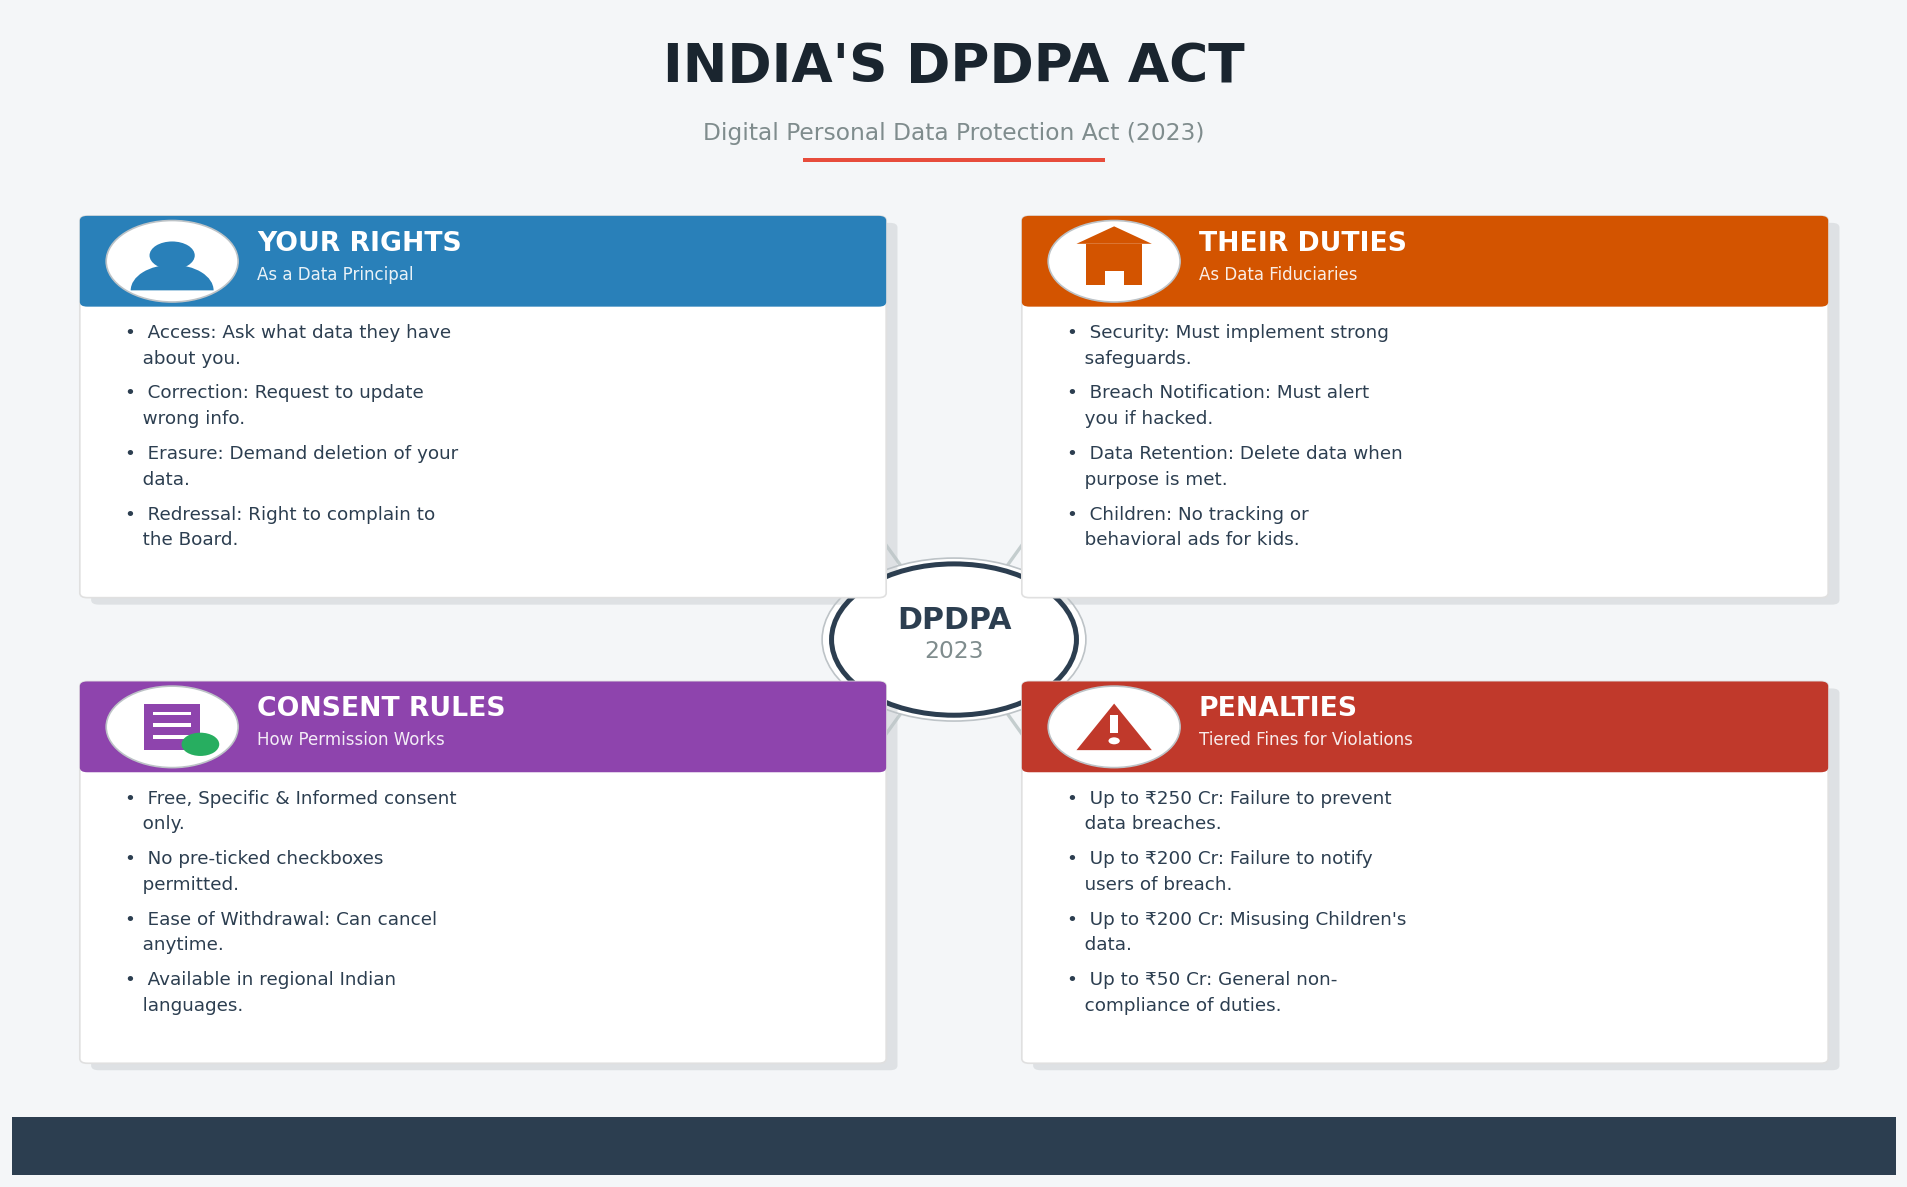

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import textwrap

def draw_professional_dashboard_v2():
    # 1. SETUP CANVAS
    fig, ax = plt.subplots(figsize=(16, 10), dpi=120)

    # Professional Corporate Background
    bg_color = '#f4f6f8'
    fig.patch.set_facecolor(bg_color)
    ax.set_facecolor(bg_color)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.axis('off')

    # ---------------------------------------------------------
    # 2. HELPER: DRAW ICONS INSIDE BADGES
    # ---------------------------------------------------------
    def draw_badge_icon(ax, center_x, center_y, icon_type, color):
        radius = 3.5
        badge = patches.Circle((center_x, center_y), radius, fc='white', ec='#bdc3c7', lw=1, zorder=5)
        ax.add_patch(badge)

        if icon_type == 'user':
            ax.add_patch(patches.Circle((center_x, center_y+0.5), 1.2, fc=color, zorder=6))
            ax.add_patch(patches.Wedge((center_x, center_y-2.5), 2.2, 0, 180, fc=color, zorder=6))

        elif icon_type == 'building':
            ax.add_patch(patches.Rectangle((center_x-1.5, center_y-2), 3, 3.5, fc=color, zorder=6))
            ax.add_patch(patches.Polygon([(center_x-2, center_y+1.5), (center_x+2, center_y+1.5), (center_x, center_y+3)], fc=color, zorder=6))
            ax.add_patch(patches.Rectangle((center_x-0.5, center_y-2), 1, 1.2, fc='white', zorder=7))

        elif icon_type == 'doc':
            ax.add_patch(patches.Rectangle((center_x-1.5, center_y-2), 3, 4, fc=color, zorder=6))
            for i in range(3):
                ax.add_patch(patches.Rectangle((center_x-1, center_y-1 + (i*1)), 2, 0.3, fc='white', zorder=7))
            ax.add_patch(patches.Circle((center_x+1.5, center_y-1.5), 1, fc='#27ae60', zorder=8))

        elif icon_type == 'alert':
            ax.add_patch(patches.Polygon([(center_x, center_y+2), (center_x-2, center_y-2), (center_x+2, center_y-2)], fc=color, zorder=6))
            ax.add_patch(patches.Rectangle((center_x-0.2, center_y-0.5), 0.4, 1.5, fc='white', zorder=7))
            ax.add_patch(patches.Circle((center_x, center_y-1.2), 0.3, fc='white', zorder=7))

    # ---------------------------------------------------------
    # 3. HELPER: DRAW CLEAN UI CARDS
    # ---------------------------------------------------------
    def draw_ui_card(x, y, w, h, color, title, subtitle, points, icon_type):
        # Shadow
        shadow = patches.FancyBboxPatch((x+0.6, y-0.6), w, h, boxstyle="round,pad=0.4",
                                      fc='#bdc3c7', ec='none', alpha=0.4, zorder=2)
        ax.add_patch(shadow)

        # Main Box
        card = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.4",
                                      fc='white', ec='#e0e0e0', lw=1, zorder=3)
        ax.add_patch(card)

        # Header Strip
        header_h = 7
        header = patches.FancyBboxPatch((x, y + h - header_h), w, header_h,
                                        boxstyle="round,pad=0.4",
                                        fc=color, ec='none', zorder=4)
        ax.add_patch(header)
        ax.add_patch(patches.Rectangle((x, y + h - header_h), w, 3, fc=color, zorder=4))

        # Titles
        plt.text(x + 9, y + h - 2.5, title, fontsize=16, weight='bold', color='white', zorder=6, fontname="DejaVu Sans")
        plt.text(x + 9, y + h - 5, subtitle, fontsize=10, color='white', alpha=0.9, zorder=6, fontname="DejaVu Sans")

        # Icon
        draw_badge_icon(ax, x + 4.5, y + h - 3.5, icon_type, color)

        # Content Text
        y_pos = y + h - 10
        for point in points:
            wrapper = textwrap.TextWrapper(width=34)
            lines = wrapper.wrap(text=point)
            for i, line in enumerate(lines):
                bullet = "•" if i == 0 else " "
                plt.text(x + 2, y_pos, f"{bullet}  {line}",
                         fontsize=11, color='#2c3e50', zorder=6, fontname="DejaVu Sans")
                y_pos -= 2.2
            y_pos -= 0.8

    # ---------------------------------------------------------
    # 4. DRAW LAYOUT
    # ---------------------------------------------------------

    # HEADER
    plt.text(50, 94, "INDIA'S DPDPA ACT", ha='center', fontsize=32, weight='bold', color='#1a252f', fontname="DejaVu Sans")
    plt.text(50, 89, "Digital Personal Data Protection Act (2023)", ha='center', fontsize=14, color='#7f8c8d', fontname="DejaVu Sans")
    ax.add_patch(patches.Rectangle((42, 87), 16, 0.4, fc='#e74c3c'))

    # CARD 1: RIGHTS (Blue)
    draw_ui_card(4, 50, 42, 32, '#2980b9', "YOUR RIGHTS", "As a Data Principal",
              [
                  "Access: Ask what data they have about you.",
                  "Correction: Request to update wrong info.",
                  "Erasure: Demand deletion of your data.",
                  "Redressal: Right to complain to the Board."
              ], 'user')

    # CARD 2: DUTIES (Orange)
    draw_ui_card(54, 50, 42, 32, '#d35400', "THEIR DUTIES", "As Data Fiduciaries",
              [
                  "Security: Must implement strong safeguards.",
                  "Breach Notification: Must alert you if hacked.",
                  "Data Retention: Delete data when purpose is met.",
                  "Children: No tracking or behavioral ads for kids."
              ], 'building')

    # CARD 3: CONSENT (Purple)
    draw_ui_card(4, 10, 42, 32, '#8e44ad', "CONSENT RULES", "How Permission Works",
              [
                  "Free, Specific & Informed consent only.",
                  "No pre-ticked checkboxes permitted.",
                  "Ease of Withdrawal: Can cancel anytime.",
                  "Available in regional Indian languages."
              ], 'doc')

    # --- UPDATED PENALTIES CARD (Red) ---
    # Now includes the Tiers: 250, 200, and 50.
    draw_ui_card(54, 10, 42, 32, '#c0392b', "PENALTIES", "Tiered Fines for Violations",
              [
                  "Up to ₹250 Cr: Failure to prevent data breaches.",
                  "Up to ₹200 Cr: Failure to notify users of breach.",
                  "Up to ₹200 Cr: Misusing Children's data.",
                  "Up to ₹50 Cr: General non-compliance of duties."
              ], 'alert')

    # CENTER HUB
    center_bg = patches.Circle((50, 46), 7, fc='white', ec='#bdc3c7', lw=1, zorder=1)
    ax.add_patch(center_bg)
    center_ring = patches.Circle((50, 46), 6.5, fc='white', ec='#2c3e50', lw=3, zorder=2)
    ax.add_patch(center_ring)
    plt.text(50, 47, "DPDPA", ha='center', fontsize=18, weight='bold', color='#2c3e50', fontname="DejaVu Sans")
    plt.text(50, 44.5, "2023", ha='center', fontsize=14, color='#7f8c8d', fontname="DejaVu Sans")

    # Connectors
    conn_style = dict(arrowstyle="-", color="#95a5a6", lw=2, zorder=0, alpha=0.5)
    ax.add_patch(patches.FancyArrowPatch((50, 46), (46, 55), **conn_style))
    ax.add_patch(patches.FancyArrowPatch((50, 46), (54, 55), **conn_style))
    ax.add_patch(patches.FancyArrowPatch((50, 46), (46, 37), **conn_style))
    ax.add_patch(patches.FancyArrowPatch((50, 46), (54, 37), **conn_style))

    # FOOTER
    ax.add_patch(patches.Rectangle((0, 0), 100, 5, fc='#2c3e50', zorder=10))
    plt.text(50, 2.5, "⚠️ EXEMPTION: Government agencies can process data without consent for National Security & Public Order.",
             ha='center', va='center', fontsize=12, color='white', weight='bold', fontname="DejaVu Sans")

    plt.tight_layout()
    plt.savefig('dpdpa_tiered_penalties.png', dpi=150)
    plt.show()

if __name__ == "__main__":
    draw_professional_dashboard_v2()